In [2]:
import torch.nn as nn

from datasets import *
from evaluation import *
from models import *
from pruning.unstructured import *
from pruning.structured import *

Matplotlib is building the font cache; this may take a moment.


Importing /data2/home/yaswanthk/smart-pruner/pruning/unstructured/L1norm.py
Importing /data2/home/yaswanthk/smart-pruner/pruning/Train.py
Importing /data2/home/yaswanthk/smart-pruner/pruning/structured/decay_pruning.py
Importing /data2/home/yaswanthk/smart-pruner/pruning/structured/two_to_four.py


In [ ]:
dataset = CIFAR10()
train_loader, test_loader = dataset.get_dataloader()

In [ ]:
#for UnstructuredL1normPrune

model = AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = UnstructuredL1normPrune(model, 5, train_loader, criterion, optimizer, 0.5)

#train and prune the model and return both the original and pruned model
original_model, pruned_model = trainer.train_prune_retrain()


In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

In [ ]:
#for Decay pruning with reverse=False
model = AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = DecayPrune(model, 5, train_loader, criterion, optimizer, 0.8, 0.05,
                     False)  #init pruning rate = 0.5, decay = 0.1

#train and prune the model and return both the original and pruned model
original_model, pruned_model = trainer.train_prune_retrain()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

In [ ]:
#for Decay pruning with reverse=True
model = AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = DecayPrune(model, 5, train_loader, criterion, optimizer, 0.8, 0.05,
                     True)  #init pruning rate = 0.5, decay = 0.1

#train and prune the model and return both the original and pruned model
original_model, pruned_model = trainer.train_prune_retrain()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

In [ ]:
model = AlexNet()
compare_compression_ratio_vs_accuracy(model, train_loader, test_loader)

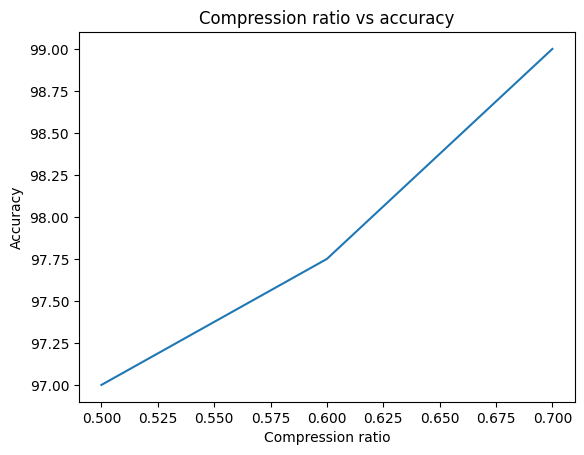

In [4]:
accuracies = [97, 97.75, 99]
compression_ratios = [0.5, 0.6, 0.7]
#plotting the trade-off between accuracy and compression ratio
plot_compression_ratio_vs_accuracy(compression_ratios, accuracies)
